In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median,variance,stdev
from scipy.stats import norm

# from ipynb.fs.full.analyze_all import HI

In [2]:
## Histogram Intersection ##
def HI(a, b,N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    HI = 0
    for i in range(0, N-1):
        HI = HI + min(a_hist[i], b_hist[i])
    return HI

In [3]:
## KLD(正規分布) ##
def KLD(a, b):
    a_mu = np.mean(a)
    a_sigma = np.std(a)
    b_mu = np.mean(b)
    b_sigma = np.std(b)
    
    return np.log(b_sigma / b_sigma) + (a_sigma*a_sigma + (a_mu - b_mu)*(a_mu - b_mu))/(2*b_sigma*b_sigma) - 1/2

In [4]:
## JSD(正規分布) ##
def JSD(a, b):
    m = np.array([a+b])/2
    return 0.5 * (KLD(a, m) + KLD(b, m))

In [5]:
## L1 norm ##
def L1Norm(a, b, N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    L1N = 0
    for i in range(0, N-1):
        L1N = L1N + abs(a_hist[i] - b_hist[i])
    return L1N

In [6]:
## L2 norm ##
def L2Norm(a, b, N=100):
    mini = min(min(a),min(b))
    maxi = max(max(a),max(b))
    a_hist, a_bins = np.histogram(a,bins=N,range=(mini,maxi),normed=True)
    b_hist, b_bins = np.histogram(b,bins=N,range=(mini,maxi),normed=True)
    L2N = 0
    for i in range(0, N-1):
        L2N = L2N + (a_hist[i] - b_hist[i]) * (a_hist[i] - b_hist[i])
    return L2N

In [7]:
## data load ##

In [8]:
## JR Local ##

In [9]:
file_name = "JR_Shinkansen/Nagoya2Shinyokohama/x.txt"
X_JR = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    X_JR.append(float(fname[1]))

file.close()
print(len(X_JR))

1834


In [10]:
file_name = "JR_Shinkansen/Nagoya2Shinyokohama/y.txt"
Y_JR = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Y_JR.append(float(fname[1]))

file.close()
print(len(Y_JR))

1834


In [11]:
file_name = "JR_Shinkansen/Nagoya2Shinyokohama/z.txt"
Z_JR = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Z_JR.append(float(fname[1]))

file.close()
print(len(Z_JR))

1834


In [12]:
T_JR = np.arange(0, len(X_JR)*0.1, 0.1)
print(len(T_JR))

1834


In [13]:
## ICE ##

In [14]:
file_name = "ICE/x.txt"
X_ICE = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    X_ICE.append(float(fname[1]))

file.close()
print(len(X_ICE))

2785


In [15]:
file_name = "ICE/y.txt"
Y_ICE = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Y_ICE.append(float(fname[1]))

file.close()
print(len(Y_ICE))

2785


In [16]:
file_name = "ICE/z.txt"
Z_ICE = []

file = open(file_name, 'r')

for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    Z_ICE.append(float(fname[1]))

file.close()
print(len(Z_ICE))

2785


In [17]:
T_ICE = np.arange(0, len(X_ICE)*0.1, 0.1)
print(len(T_ICE))

2785


In [18]:
## show ##

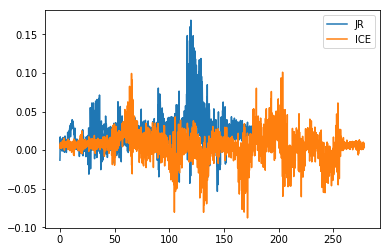

In [19]:
plt.plot(T_JR, X_JR, label="JR")
#plt.scatter(T_JR, X_JR,label="JR")
plt.plot(T_ICE, X_ICE, label="ICE")
#plt.scatter(T_ICE, X_ICE,label="ICE")
plt.legend()
plt.show()

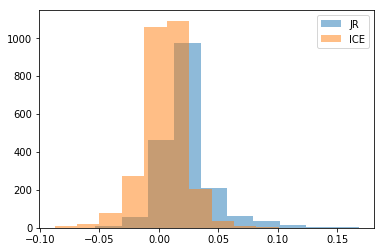

In [20]:
ave = mean(X_JR)
sigma = stdev(X_JR)
X_nd_JR = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_JR = norm.pdf(X_nd_JR,ave,sigma)
ave = mean(X_ICE)
sigma = stdev(X_ICE)
X_nd_ICE = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_ICE = norm.pdf(X_nd_ICE,ave,sigma)
plt.figure()
plt.hist(X_JR,alpha=0.5,label="JR")
plt.hist(X_ICE,alpha=0.5,label="ICE")
plt.legend()
plt.show()

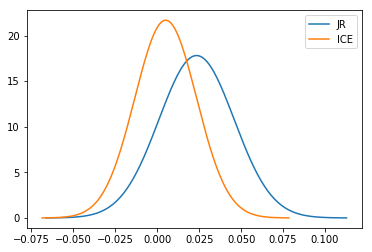

In [21]:
plt.plot(X_nd_JR,Y_nd_JR,label="JR")
plt.plot(X_nd_ICE,Y_nd_ICE,label="ICE")
plt.legend()

In [22]:
KLD(X_JR,X_ICE)

0.740769444535128

In [23]:
JSD(X_JR,X_ICE)

1.853883048662972

In [24]:
HI(X_JR,X_ICE)

212.22527305051327

In [25]:
L1Norm(X_JR,X_ICE)

356.6413836946438

In [26]:
L2Norm(X_JR,X_ICE)

4828.6916903427755

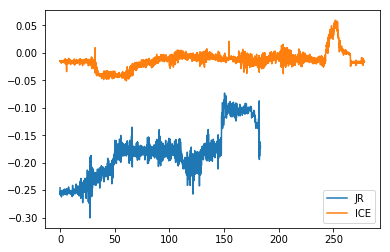

In [27]:
plt.plot(T_JR, Y_JR,label="JR")
#plt.scatter(T_JR, Y_JR,label="JR")
plt.plot(T_ICE, Y_ICE,label="ICE")
#plt.scatter(T_ICE, Y_ICE,label="ICE")
plt.legend()
plt.show()

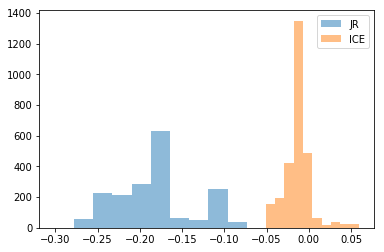

In [28]:
ave = mean(Y_JR)
sigma = stdev(Y_JR)
X_nd_JR = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_JR = norm.pdf(X_nd_JR,ave,sigma)
ave = mean(Y_ICE)
sigma = stdev(Y_ICE)
X_nd_ICE = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_ICE = norm.pdf(X_nd_ICE,ave,sigma)
plt.figure()
plt.hist(Y_JR,alpha=0.5,label="JR")
plt.hist(Y_ICE,alpha=0.5,label="ICE")
plt.legend()
plt.show()

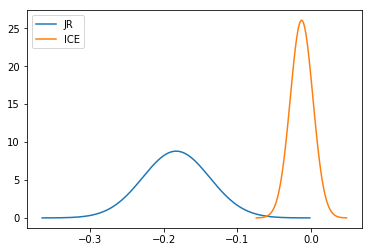

In [29]:
plt.plot(X_nd_JR,Y_nd_JR,label="JR")
plt.plot(X_nd_ICE,Y_nd_ICE,label="ICE")
plt.legend()

In [30]:
KLD(Y_JR,Y_ICE)

65.3218918392982

In [31]:
JSD(Y_JR,Y_ICE)

2.4753901678889845

In [32]:
HI(Y_JR,Y_ICE)

0.0

In [33]:
L1Norm(Y_JR,Y_ICE)

554.7805749133488

In [34]:
L2Norm(Y_JR,Y_ICE)

10647.636104293795

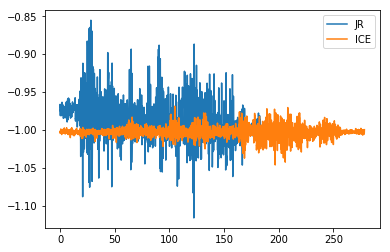

In [35]:
plt.plot(T_JR, Z_JR,label="JR")
#plt.scatter(T_JR, Z_JR,label="JR")
plt.plot(T_ICE, Z_ICE,label="ICE")
#plt.scatter(T_ICE, Z_ICE,label="ICE")
plt.legend()
plt.show()

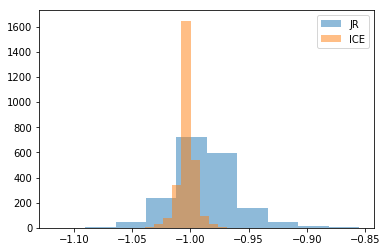

In [36]:
ave = mean(Z_JR)
sigma = stdev(Z_JR)
X_nd_JR = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_JR = norm.pdf(X_nd_JR,ave,sigma)
ave = mean(Z_ICE)
sigma = stdev(Z_ICE)
X_nd_ICE = np.arange(ave-4*sigma,ave+4*sigma,0.001)
Y_nd_ICE = norm.pdf(X_nd_ICE,ave,sigma)
plt.figure()
plt.hist(Z_JR,alpha=0.5,label="JR")
plt.hist(Z_ICE,alpha=0.5,label="ICE")
plt.legend()
plt.show()

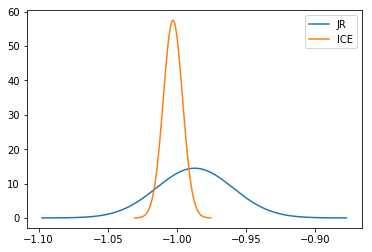

In [37]:
plt.plot(X_nd_JR,Y_nd_JR,label="JR")
plt.plot(X_nd_ICE,Y_nd_ICE,label="ICE")
plt.legend()

In [38]:
KLD(Z_JR,Z_ICE)

9.99706409290548

In [39]:
JSD(Z_JR,Z_ICE)

1266.5584386264115

In [40]:
HI(Z_JR,Z_ICE)

153.59098857047542

In [41]:
L1Norm(Z_JR,Z_ICE)

458.3939863041419

In [42]:
L2Norm(Z_JR,Z_ICE)

15009.089483114087